<a href="https://colab.research.google.com/github/Student-IshitaRane/Crop-Prediction/blob/main/OEAfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the csv file and display the data**




In [ ]:
df = pd.read_csv("Crop_recommendation.csv")

In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (2200, 8)


In [ ]:
display(df)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**Data Cleaning**

In [ ]:
df.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [ ]:
print("\nNull values in dataset:")
print(df.isnull().sum())


Null values in dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


**Data Visualization**

Using histogram to visualize feature distributions

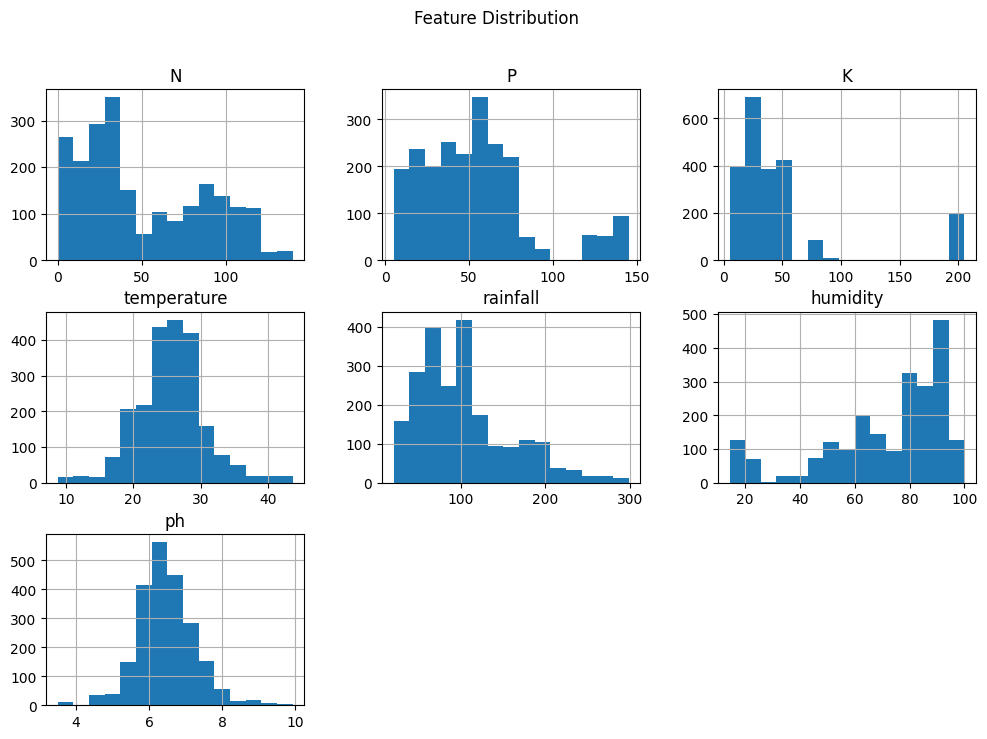

In [ ]:
df[['N', 'P', 'K', 'temperature', 'rainfall','humidity','ph']].hist(bins=15, figsize=(12, 8))
plt.suptitle("Feature Distribution")
plt.show()

Using heatmap to understand feature correlation

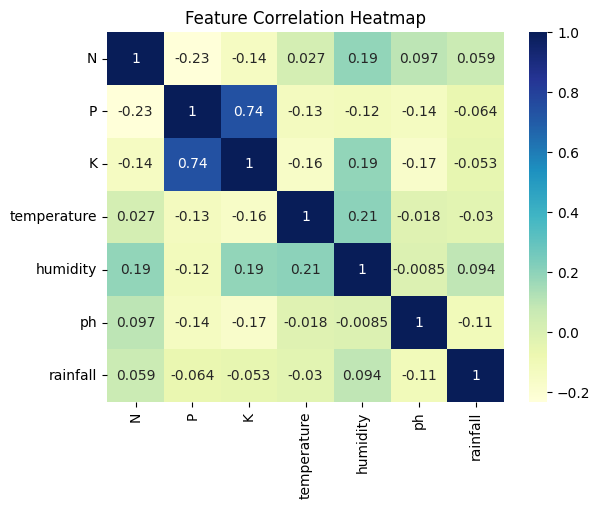

In [ ]:
numerical_features = df.select_dtypes(include=['number'])
sns.heatmap(numerical_features.corr(), annot=True, cmap='YlGnBu')
plt.title('Feature Correlation Heatmap')
plt.show()

Using scatter plot

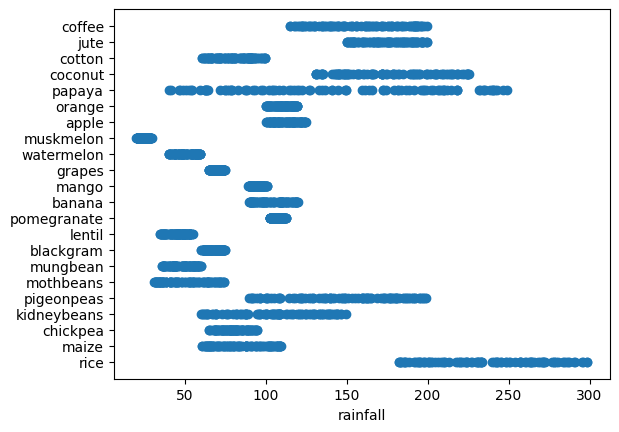

In [ ]:
plt.scatter(df.rainfall,df.label)
plt.xlabel("rainfall")
plt.show()

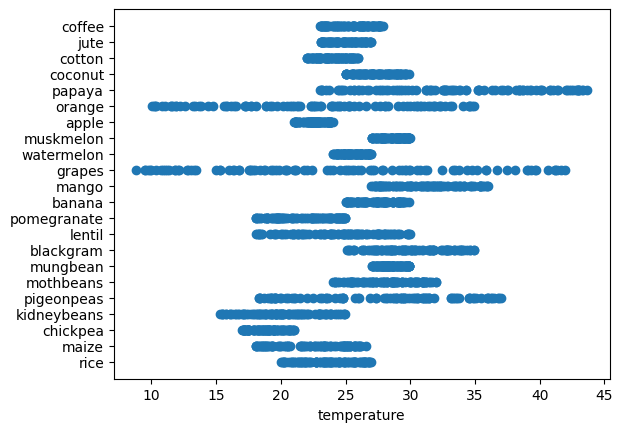

In [ ]:
plt.scatter(df.temperature,df.label)
plt.xlabel("temperature")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


**Feature Selection**

In [ ]:
colm = ['N', 'P', 'K', 'temperature', 'humidity']
x = df[colm].values
y = df['label'].values

In [ ]:
print("\nSelected feature values (X):")
print(x)


Selected feature values (X):
[[ 90.          42.          43.          20.87974371  82.00274423]
 [ 85.          58.          41.          21.77046169  80.31964408]
 [ 60.          55.          44.          23.00445915  82.3207629 ]
 ...
 [118.          33.          30.          24.13179691  67.22512329]
 [117.          32.          34.          26.2724184   52.12739421]
 [104.          18.          30.          23.60301571  60.39647474]]


In [ ]:
print("\nCrop labels (y):")
print(y)


Crop labels (y):
['rice' 'rice' 'rice' ... 'coffee' 'coffee' 'coffee']


**Splitting the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=27)

In [ ]:
print("\nTraining labels:")
print(ytrain)


Training labels:
['cotton' 'coffee' 'banana' ... 'watermelon' 'blackgram' 'banana']


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain_scaled = sc_x.fit_transform(xtrain)
xtest_scaled = sc_x.transform(xtest)

In [ ]:
print("\nScaled training data:")
print(xtrain_scaled)


Scaled training data:
[[ 1.83343951 -0.27974512 -0.66185638 -0.69491349  0.47592109]
 [ 1.75211603 -0.75835363 -0.28842951 -0.43826922 -0.54397608]
 [ 1.29128301  0.5877328   0.08499737  0.12467455  0.3942133 ]
 ...
 [ 1.56236126 -0.96774485  0.12430546 -0.15019165  0.7880706 ]
 [-0.38940215  0.76721099 -0.58324019  0.37255261 -0.13752353]
 [ 1.31839083  0.79712402  0.06534332  0.37161627  0.22152223]]


In [ ]:
print("\nScaled testing data:")
print(xtest_scaled)


Scaled testing data:
[[-0.68758822 -1.26687517 -0.74047256 -2.36451188  0.84348863]
 [-0.60626475  0.10912429 -0.56358615 -0.00992884 -0.98264451]
 [ 1.48103778 -0.96774485 -0.26877546 -0.00644429 -0.69623621]
 ...
 [ 0.88466563 -0.39939725 -0.13119714  0.12322434  0.04452154]
 [-0.25386302  0.22877642 -0.52427806  0.12118488 -0.45803704]
 [ 0.69491085 -0.45922331 -0.24912141 -0.75042036  0.35481774]]


**Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
reg_model = LogisticRegression()
reg_model.fit(xtrain_scaled, ytrain)


LogisticRegression()

**Evaluating performance of the model**

In [ ]:
ypredict_log = reg_model.predict(xtest_scaled)
print("\nLogistic Regression Score:", reg_model.score(xtest_scaled, ytest))


Logistic Regression Score: 0.9121212121212121


In [ ]:
print("Logistic Regression Train Score:", reg_model.score(xtrain_scaled, ytrain))

Logistic Regression Train Score: 0.9181818181818182


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(ytest, ypredict_log)
print("\nConfusion Matrix (Logistic Regression):")
print(cm)


Confusion Matrix (Logistic Regression):
[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 32  0  0  0  0  4  0 

In [ ]:
print("\nClassification Report (Logistic Regression):")
print(classification_report(ytest, ypredict_log))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       0.96      1.00      0.98        22
   blackgram       0.85      0.90      0.88        39
    chickpea       1.00      1.00      1.00        35
     coconut       0.97      0.97      0.97        29
      coffee       0.94      1.00      0.97        30
      cotton       1.00      1.00      1.00        33
      grapes       1.00      1.00      1.00        30
        jute       0.58      0.84      0.69        25
 kidneybeans       0.82      0.97      0.89        29
      lentil       0.76      0.93      0.83        27
       maize       0.97      0.94      0.96        34
       mango       0.94      1.00      0.97        31
   mothbeans       1.00      0.84      0.91        38
    mungbean       0.94      1.00      0.97        29
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      0.89  

**Using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB() //create a model
classifier_nb.fit(xtrain, ytrain)  //fitting training data

GaussianNB()

In [ ]:
y_pred_nb = classifier_nb.predict(xtest)

**Evaluating performance of the model**

In [ ]:
print("\nNaive Bayes Score:", classifier_nb.score(xtest, ytest))


Naive Bayes Score: 0.9484848484848485


In [ ]:
print("Naive Bayes Train Score:", classifier_nb.score(xtrain, ytrain))

Naive Bayes Train Score: 0.9577922077922078


In [ ]:
print("\nConfusion Matrix (Naive Bayes):")
print(confusion_matrix(ytest, y_pred_nb))


Confusion Matrix (Naive Bayes):
[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 36  0  0  0  0  2  0  0  0]
 

In [ ]:
print("\nClassification Report (Naive Bayes):")
print(classification_report(ytest, y_pred_nb))


Classification Report (Naive Bayes):
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        22
   blackgram       0.85      0.87      0.86        39
    chickpea       1.00      1.00      1.00        35
     coconut       1.00      0.97      0.98        29
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        33
      grapes       1.00      1.00      1.00        30
        jute       0.69      0.72      0.71        25
 kidneybeans       1.00      1.00      1.00        29
      lentil       0.77      0.89      0.83        27
       maize       1.00      1.00      1.00        34
       mango       1.00      1.00      1.00        31
   mothbeans       0.95      0.95      0.95        38
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00      1.00

**Using Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(xtrain, ytrain)


DecisionTreeClassifier()

In [ ]:
y_pred_tree = classifier_tree.predict(xtest)

**Evaluating performance of the model**

In [ ]:
print("\nDecision Tree Score:", classifier_tree.score(xtest, ytest))


Decision Tree Score: 0.9378787878787879


In [ ]:
print("Decision Tree Train Score:", classifier_tree.score(xtrain, ytrain))

Decision Tree Train Score: 1.0


In [ ]:
print("\nConfusion Matrix (Decision Tree):")
print(confusion_matrix(ytest, y_pred_tree))


Confusion Matrix (Decision Tree):
[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  1  0  0  0  0  2  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 37  0  0  0  0  1  0  0  0]

In [ ]:
print("\nClassification Report (Decision Tree):")
print(classification_report(ytest, y_pred_tree))


Classification Report (Decision Tree):
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        22
   blackgram       0.89      0.85      0.87        39
    chickpea       1.00      1.00      1.00        35
     coconut       1.00      1.00      1.00        29
      coffee       0.94      1.00      0.97        30
      cotton       1.00      1.00      1.00        33
      grapes       1.00      1.00      1.00        30
        jute       0.71      0.68      0.69        25
 kidneybeans       1.00      1.00      1.00        29
      lentil       0.77      0.74      0.75        27
       maize       1.00      0.97      0.99        34
       mango       0.97      0.97      0.97        31
   mothbeans       0.93      0.97      0.95        38
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00      1.

**Taking user input to check if crop can be yield in given conditions or not**

In [ ]:
features = ['N', 'P', 'K', 'temperature', 'humidity']
feature_means = df[features].mean()

In [ ]:
print('\nEnter the following values (or press enter to use average):')
user_input = []

for feature in features:
    value = input(f"{feature}: ")
    if value:
        user_input.append(float(value))
    else:
        user_input.append(feature_means[feature])


Enter the following values (or press enter to use average):
N: 90
P: 42
K: 43
temperature: 20
humidity: 82


In [ ]:
user_input_np = np.array(user_input).reshape(1, -1)


In [ ]:
predicted_crop = classifier_tree.predict(user_input_np)


In [ ]:
crop_input = input("\nEnter the crop you plan to grow: ")
if predicted_crop[0].lower() == crop_input.lower():
    print("✅ Yes, this crop is suitable for your conditions.")
else:
    print("❌ No, this crop is not recommended based on your input.")


Enter the crop you plan to grow: rice
✅ Yes, this crop is suitable for your conditions.
